Analyzing Air Quality Index (AQI) Trends in a City
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels,and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color Schemes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("C:/Users/Ayaan/Downloads/Air Quality.csv")
data.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49005 entries, 0 to 49004
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     33241 non-null  float64
 1   sampling_date                49005 non-null  object 
 2   state                        49005 non-null  object 
 3   location                     49005 non-null  object 
 4   agency                       32650 non-null  object 
 5   type                         48011 non-null  object 
 6   so2                          47692 non-null  float64
 7   no2                          48147 non-null  float64
 8   rspm                         46309 non-null  float64
 9   spm                          20346 non-null  float64
 10  location_monitoring_station  46468 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         49005 non-null  object 
dtypes: float64(6), o

In [4]:
data.isnull().sum()

stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                         16355
type                             994
so2                             1313
no2                              858
rspm                            2696
spm                            28659
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64

In [5]:
data['date'] = pd.to_datetime(data['date'])
data['year']=data['date'].dt.year
data = data.sort_values('date')  # sort by date

In [6]:
data.dtypes

stn_code                              float64
sampling_date                          object
state                                  object
location                               object
agency                                 object
type                                   object
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station            object
pm2_5                                 float64
date                           datetime64[ns]
year                                    int32
dtype: object

In [7]:
cat_col=data.select_dtypes(include=['object']).astype(str)

# categorical_cols = ['stn_code','state', 'location', 'agency', 'type', 'location_monitoring_station']
for col in cat_col:
    data[col] = data[col].fillna(data[col].mode()[0])

num_cols=['so2', 'no2', 'rspm', 'spm', 'pm2_5']
for col in num_cols:
    data[col] = data[col].fillna(data[col].mean())

data.isnull().sum()

stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                             0
type                               0
so2                                0
no2                                0
rspm                               0
spm                                0
location_monitoring_station        0
pm2_5                          49005
date                               0
year                               0
dtype: int64

In [8]:
data.drop(columns='sampling_date',axis=1,inplace=True)
print("Before Drop Duplicates:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Before Drop Duplicates:", data.duplicated().sum())

Before Drop Duplicates: 230
Before Drop Duplicates: 0


In [9]:
data.shape

(48775, 13)

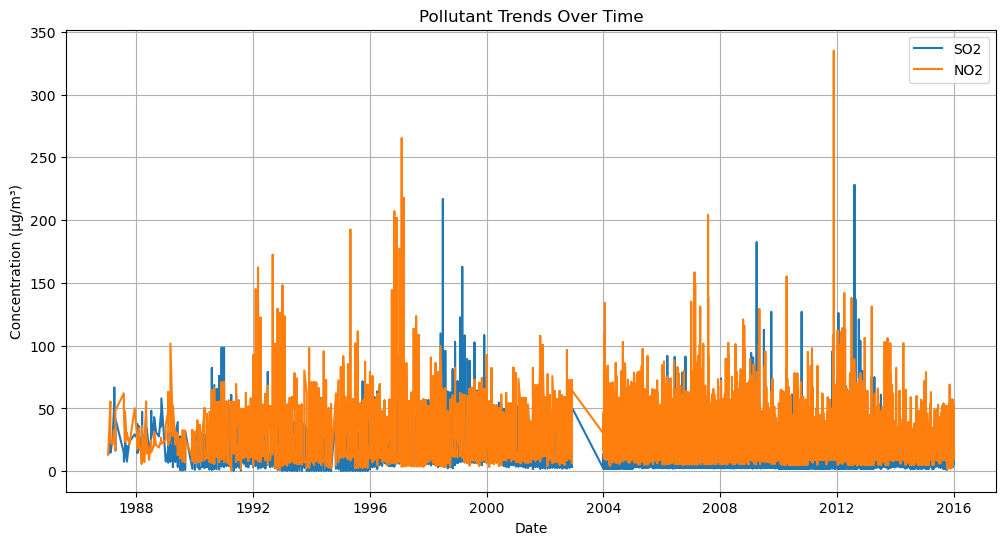

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['so2'], label="SO2")
plt.plot(data['date'], data['no2'], label="NO2")
plt.legend()
plt.title("Pollutant Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Concentration (µg/m³)")
plt.grid(True)
plt.show()


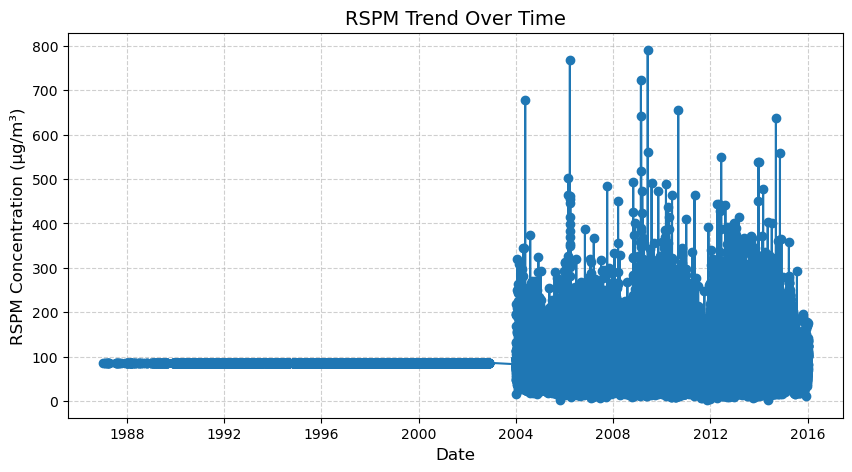

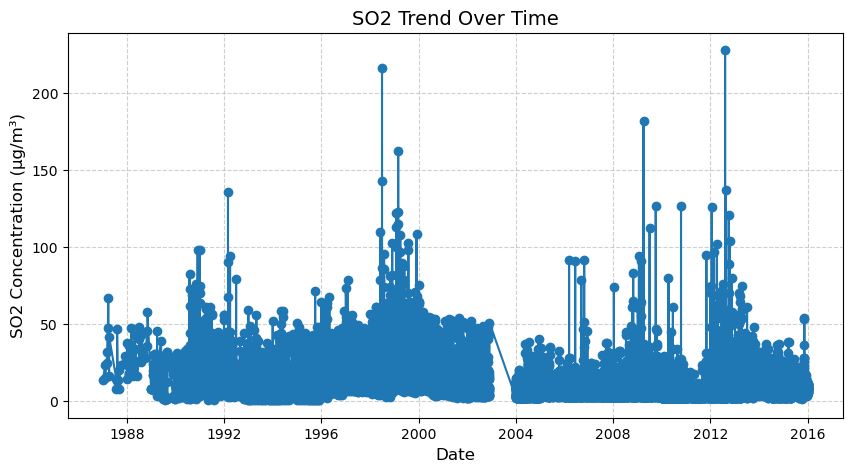

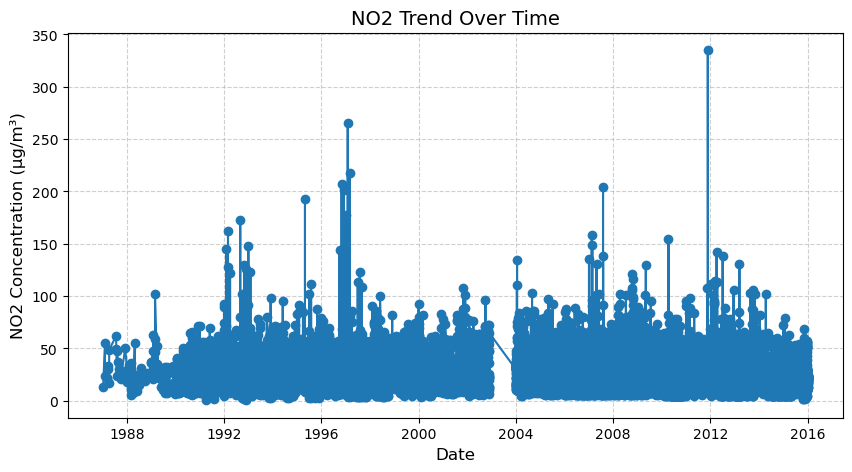

In [16]:
import matplotlib.pyplot as plt

# List of pollutants to plot
pollutants = ['rspm', 'so2', 'no2']

for col in pollutants:
    plt.figure(figsize=(10,5))
    plt.plot(data['date'], data[col], marker='o', linestyle='-')
    plt.title(f"{col.upper()} Trend Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(f"{col.upper()} Concentration (µg/m³)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


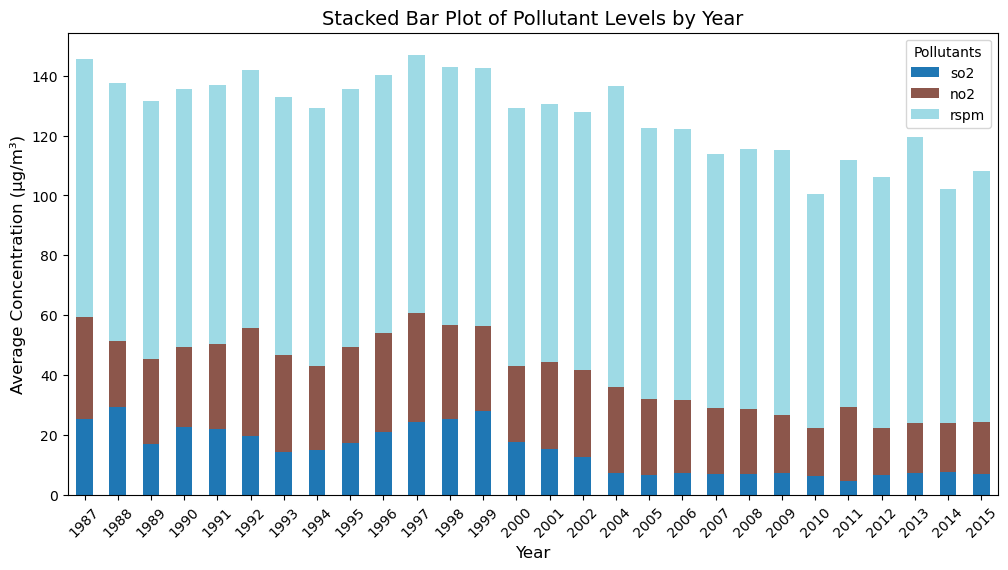

In [12]:
yearly = data.groupby('year')[['so2','no2','rspm']].mean()
# Stacked bar chart
yearly.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Stacked Bar Plot of Pollutant Levels by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Concentration (µg/m³)", fontsize=12)
plt.legend(title="Pollutants")
plt.xticks(rotation=45)
plt.show()


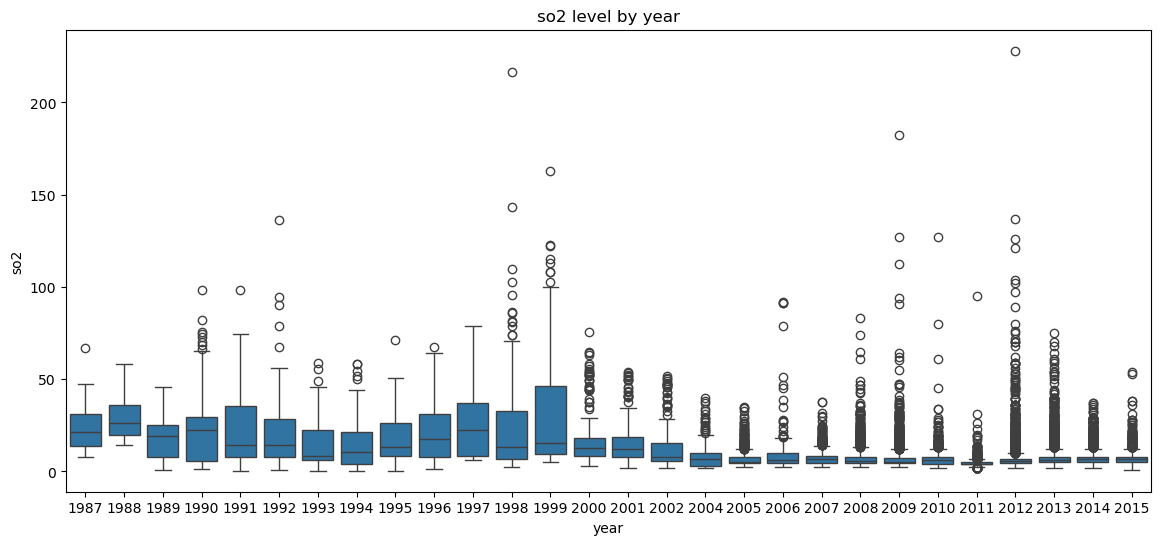

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.boxplot(x='year',y='so2',data=data)
plt.title('so2 level by year')
plt.xlabel('year')
plt.ylabel('so2')
plt.show()

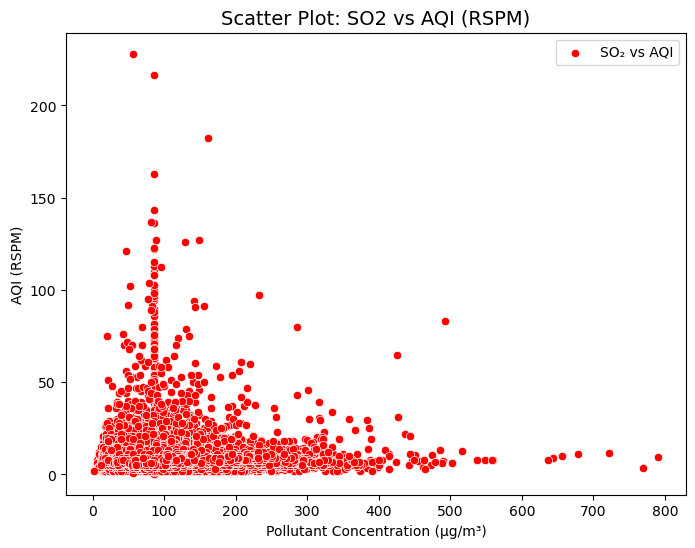

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='rspm', y='so2', data=data, label="SO₂ vs AQI", color="red")
plt.title("Scatter Plot: SO2 vs AQI (RSPM)", fontsize=14)
plt.xlabel("Pollutant Concentration (µg/m³)")
plt.ylabel("AQI (RSPM)")
plt.legend()
plt.show()
